In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
## to prevent from file connectivity error
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
from zipfile import ZipFile
filename = "Datasets.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
2/2 [==============================] - 4s 2s/step - loss: 0.2332 - accuracy: 0.9219 - val_loss: 0.8801 - val_accuracy: 0.6897
Epoch 2/40
2/2 [==============================] - 1s 666ms/step - loss: 0.2221 - accuracy: 0.9375 - val_loss: 0.8189 - val_accuracy: 0.7931
Epoch 3/40
2/2 [==============================] - 1s 655ms/step - loss: 0.2366 - accuracy: 0.9219 - val_loss: 0.8150 - val_accuracy: 0.8103
Epoch 4/40
2/2 [==============================] - 1s 623ms/step - loss: 0.1993 - accuracy: 0.9219 - val_loss: 0.9022 - val_accuracy: 0.7069
Epoch 5/40
2/2 [==============================] - 1s 646ms/step - loss: 0.2168 - accuracy: 0.9688 - val_loss: 0.8598 - val_accuracy: 0.7241
Epoch 6/40
2/2 [==============================] - 1s 634ms/step - loss: 0.2326 - accuracy: 0.9844 - val_loss: 0.8531 - val_accuracy: 0.7241
Epoch 7/40
2/2 [==============================] - 1s 637ms/step - loss: 0.2129 - accuracy: 0.9531 - val_loss: 0.9143 - val_accuracy: 0.7069
Epoch 8/40
2/2 [=======

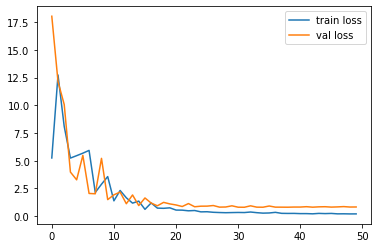

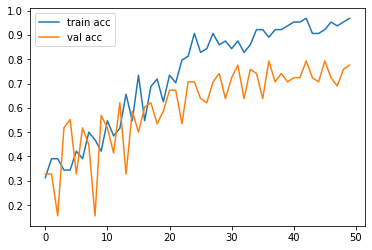

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[4.82103974e-02, 4.58195180e-01, 4.93594438e-01],
       [3.34801935e-02, 3.93669128e-01, 5.72850704e-01],
       [8.91651493e-04, 9.88704503e-01, 1.04038343e-02],
       [7.70575483e-04, 9.93574083e-01, 5.65532176e-03],
       [3.77306994e-03, 6.79478049e-02, 9.28279161e-01],
       [3.31010600e-03, 5.61637998e-01, 4.35051918e-01],
       [2.62288377e-02, 7.34055741e-03, 9.66430604e-01],
       [1.40386373e-01, 5.63123465e-01, 2.96490192e-01],
       [4.58971620e-01, 2.86335647e-01, 2.54692733e-01],
       [1.46094719e-02, 2.87634492e-01, 6.97756052e-01],
       [2.28658406e-04, 9.87481415e-01, 1.22900540e-02],
       [2.82066852e-01, 5.19534588e-01, 1.98398545e-01],
       [1.33023068e-01, 8.17961574e-01, 4.90153171e-02],
       [7.81270862e-02, 7.62318373e-01, 1.59554511e-01],
       [1.73090859e-06, 1.26425119e-03, 9.98734057e-01],
       [3.25826406e-02, 1.40018299e-01, 8.27399075e-01],
       [1.47041991e-01, 5.27088821e-01, 3.25869173e-01],
       [5.77104352e-02, 1.43074

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred                                ## 0,1,2 defines the classes

array([2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/Datasets/Train/mercedes/17.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x     

array([[[218., 155., 122.],
        [218., 155., 122.],
        [218., 155., 122.],
        ...,
        [207., 143., 107.],
        [207., 143., 107.],
        [207., 143., 107.]],

       [[217., 154., 121.],
        [217., 154., 121.],
        [217., 154., 121.],
        ...,
        [210., 146., 110.],
        [210., 146., 110.],
        [210., 146., 110.]],

       [[215., 152., 119.],
        [215., 152., 119.],
        [215., 152., 119.],
        ...,
        [213., 149., 113.],
        [213., 149., 113.],
        [213., 149., 113.]],

       ...,

       [[203., 154., 122.],
        [179., 130.,  98.],
        [189., 138., 109.],
        ...,
        [174., 139., 119.],
        [198., 163., 143.],
        [163., 128., 108.]],

       [[165., 114., 110.],
        [121.,  72.,  65.],
        [162., 114., 100.],
        ...,
        [141., 101.,  91.],
        [108.,  68.,  56.],
        [173., 133., 121.]],

       [[134.,  83.,  79.],
        [101.,  52.,  45.],
        [145.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[6.4158281e-05, 3.1613378e-04, 9.9961972e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

[2]


In [ ]:
####   O,1,2 dentoes the classes


if (a==0):
  print("The predicted class is Audi")
elif (a==1):
  print("The predicted class is Lamborghini")
else:
  print("The predicted class is Mercedes")
    

The predicted class is Mercedes
